In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import heapq
import matplotlib.pyplot as plt
from IPython.display import Audio as player
import librosa
# !pip install playsound
# import playsound
# !pip install pyaudio
# import pyaudio


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-vectors/id_vectors-3.csv
/kaggle/input/music-vectors/id_vectors-2.csv
/kaggle/input/music-vectors/id_vectors-5.csv
/kaggle/input/music-vectors/id_vectors-4.csv
/kaggle/input/raag-dataset-100-9/raag-dataset-100-9.csv
/kaggle/input/similarity-matrices/raag-similarity-matrix.npy
/kaggle/input/similarity-matrices/meta-similarity-matrix.npy
/kaggle/input/similarity-matrices/raag-similarity-matrix-mean.npy
/kaggle/input/similarity-matrices/meta-similarity-matrix-1.npy
/kaggle/input/similarity-matrices/raag-similarity-matrix-2.npy
/kaggle/input/darbar-audio/darbar_audio/RaamSimaarEhaTeroKaajBhaiBaldeepSinghRaagJaijaiwantiGurbanimp.mp3
/kaggle/input/darbar-audio/darbar_audio/RaagMalkaunsIndraniMukherjeeKhayalVocalMusicofIndiamp.mp3
/kaggle/input/darbar-audio/darbar_audio/SunriseRaagBhairaviManjushaPatilIndianClassicalMusicVRmp.mp3
/kaggle/input/darbar-audio/darbar_audio/MilindMalsheRaagHindolPanchammp.mp3
/kaggle/input/darbar-audio/darbar_audio/SublimeRaagBhimpalasiPartTwoP

In [50]:
import pandas as pd
print('Pandas version: ', pd.__version__)

import numpy as np
print('NumPy version: ', np.__version__)

import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

from matplotlib import pyplot as plt

import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans


import pickle
print('Pickle version: ', pickle.format_version)

import sys
print('Sys version: ', sys.version[0:5])

from sys import exc_info

import ast

Pandas version:  2.2.2
NumPy version:  1.26.4
Matplotlib version:  3.7.5
Scikit-Learn version:  1.2.2
Pickle version:  4.0
Sys version:  3.10.


# Datasets

In [51]:
id_dataset = pd.read_csv("/kaggle/input/music-vectors/id_vectors-5.csv")

In [52]:
meta_dataset = pd.read_csv("/kaggle/input/filtered-final-metadata-4/filtered-final-metadata-6.csv")
meta_dataset

,Raga,Duration,Artist,Instrument,Laya,Taal,Accompanists,Instruments,Form,Name
0,Sahana,474,Abhisek Lahiri,Sarod,Madhya,Jhaptaal,Sanju Sahai,Tabla,Khyal,RaagSahanaAbhisekLahiriMusicofIndia
1,Shree,713,Abhisek Lahiri,Sarod,Drut,Teentaal,Sukhvinder Singh 'Pinky',Tabla,Khyal,AbhisekLahiriSukhvinderSinghPinkyRaagShreeSaro...
2,Malkauns,247,Abhisek Lahiri,Sarod,Drut,NaN,NaN,NaN,Jor|Jhala,SpellbindingRaagMalkaunsAbhisekLahiriMusicofIndia
3,Kaunsi Kanada,59,Abhisek Lahiri,Sarod,Drut,NaN,NaN,NaN,Khyal,RaagKaunsiKanadaAbhisekLahiriMusicofIndia
4,Chayanat,598,Abhisek Lahiri,Sarod,Madhya,Roopak,Sukhvinder Singh 'Pinky',Tabla,Khyal,AbhisekLahiriSukhvinderSinghPinkyRaagChayanatS...
...,...,...,...,...,...,...,...,...,...,...
308,Multani,657,Venkatesh Kumar,Vocal,Vilambit,Ektaal,Murad Ali Khan|Satyajit Talwalkar|Tofail Ahmed,Sarangi|Tabla|Harmonium,Khyal,AmazingRaagMultaniPanditVenkateshKumarSarangiH...
309,Multani,335,Venkatesh Kumar,Vocal,Drut,Teentaal,Satyajit Talwalkar|Murad Ali|Tofail Ahmed,Tabla|Sarangi|Harmonium,Khyal,PowerfulKhayalRaagMultaniPanditVenkateshKumarM...
310,Patdeep,327,Venkatesh Kumar,Vocal,Madhya,Jhaptal,Murad Ali Khan|Satyajit Talwalkar|Tofail Ahmed,Sarangi|Tabla|Harmonium,Khyal,MajesticRaagPatdeepVenkateshKumarKhayalvocal
311,Shuddha Sarang,429,Vinayak Torvi,Vocal,Madhya,Teentaal,Kousic Sen|Bharat Bhushan Goswami|Ajay Joglekar,Tabla|Sarangi|Harmonium,Khyal,PanditVinayakTorviRaagShudhSarangKhayalVocal


In [53]:
dummy_metaID = len(id_dataset)
dummy_metaID

313

In [54]:
simR = np.load('/kaggle/input/similarity-matrices/raag-similarity-matrix-mean.npy')
simM = np.load('/kaggle/input/similarity-matrices/meta-similarity-matrix-1.npy')

zero_row = np.zeros((1, simM.shape[1]))  # One row with same number of columns as sim_meta
zero_col = np.zeros((simM.shape[0]+1, 1))  # One column with same number of rows as sim_meta

simM = np.concatenate([simM, zero_row], axis=0)  # Add row
simM = np.concatenate([simM, zero_col], axis=1)  # Add column



Analysis

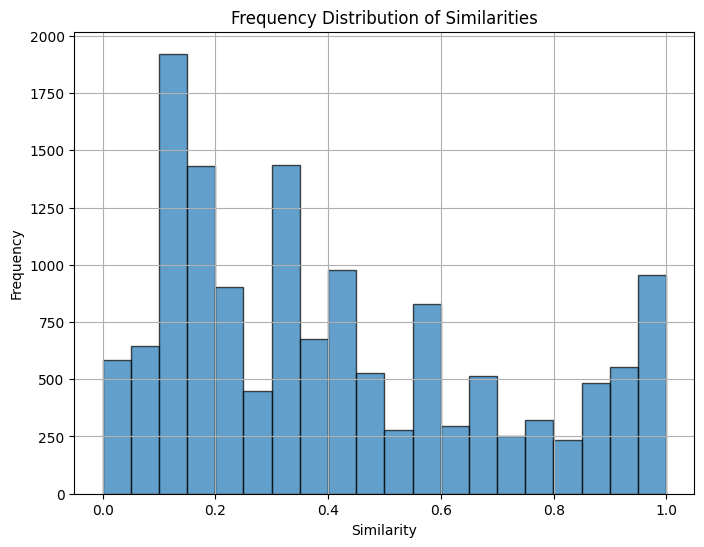

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming similarity_matrix is your 2D similarity matrix
# Generate a sample similarity matrix for demonstration


# Flatten the simiRlarity matrix into a 1D array and remove diagonal elements
similarities = simR.flatten()
similarities = similarities[similarities != 1.0]  # Remove self-similarities

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
plt.hist(similarities, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Similarities')
plt.grid(True)
plt.show()


In [57]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/artist-map/artist-map-3.csv')
artist_dict = {}
# Convert the DataFrame to a dictionary
for _,row in df.iterrows():
    try:
        artist_id = row['artist_id']
        artist_name = row['artist_name']

        artist_dict[str(artist_id) ] = artist_name.strip()
    except:
        continue
len(artist_dict)
artist_dict

{'0': 'A T Kanan',
 '1': 'Aarshin Karande',
 '2': 'Aashish Khan',
 '3': 'Abbas Ali Khan',
 '4': 'Abdul Halim Jaffer Khan',
 '5': 'Abdul Karim Khan',
 '6': 'Abdul Khaleque Khan',
 '7': 'Abdul Latif Khan',
 '8': 'Abdul Majid Khan',
 '9': 'Abdul Wahid Khan',
 '10': 'Abhijit Banerjee',
 '11': 'Abhijit Datta',
 '12': 'Abhijit Pohankar',
 '13': 'Abhisek Lahiri',
 '14': 'Abhishek Borkar',
 '15': 'Abida Parveen',
 '16': 'Abu Daud',
 '17': 'Achapal Miya or Ghulam Hussain Khan',
 '18': 'Achpal Miyan',
 '19': 'Achyut Keshav Abhyankar',
 '20': 'Aditya Shah',
 '21': 'Adwait Joshi',
 '22': 'Aishwarya Rao',
 '23': 'Ajay Pohankar',
 '24': 'Ajit Kadkade',
 '25': 'Ajoy Chakraborty',
 '26': 'Akhil Jobanputra',
 '27': 'Akhtar Ali Khan and Zakir Ali Khan',
 '28': 'Akhtar Hussain Khan',
 '29': 'Akram Khan',
 '30': 'Ali Ahmad Hussain Khan',
 '31': 'Ali Akbar Khan',
 '32': "Ali Baksh Khan 'Jarnail'",
 '33': 'Ali Baksh Khan Kasurwale',
 '34': 'Ali Hussain khan',
 '35': 'Alla Rakha',
 '36': 'Alladiya Miyan',
 '

In [58]:
import os

def get_audio_file_names(directory):
    """
    Get the names of audio files (without extensions) from the specified directory.

    Args:
    - directory (str): Path to the directory containing audio files.

    Returns:
    - file_names (list): List of audio file names (without extensions) in the directory.
    """
    file_names = []
    # Iterate over all files in the directory
    for file_name in os.listdir(directory):
        # Check if the file is an audio file
        if file_name.endswith('.mp3') or file_name.endswith('.wav'):
            # Remove the extension and add the file name to the list
            file_names.append(os.path.splitext(file_name)[0])
    return file_names

audio_files=get_audio_file_names('/kaggle/input/darbar-audio/darbar_audio')
len(audio_files)

338

In [59]:
import math

coeff = 1/1000000
def getAudioSimilarity(songID1,songID2):
    try:
        rec1 = song_name.loc[int(songID1),'Name'] + 'mp'
        rec2 = song_name.loc[int(songID2),'Name'] + 'mp'
        global best_fit
        sim12 = (-2 / math.pi * math.atan(math.pi * coeff *abs(sim[f'(\'{rec1}\', \'{rec2}\')']) / 2) + 1)
        sim21 = (-2 / math.pi * math.atan(math.pi * coeff *abs(sim[f'(\'{rec2}\', \'{rec1}\')']) / 2) + 1)
        return (sim12+sim21)/2
    except:
        return 0

In [60]:
maxsofar = -1
for i in range(313):
    maxsofar = max(maxsofar,getAudioSimilarity(5,i))
  
maxsofar

0

In [61]:
def rec_sim(rec1,rec2,user):

    rec1_split = ""
    user_split = ""
    rec2_split = ""
    
    
    if rec1 != "":
        rec1_split = rec1.split('|')
    if user[2] != "":
        user_split = user[0].split('|')
    if rec2 != "":
        rec2_split = rec2.split('|')
    
    sim = 0
    
    length = (len(rec1_split)+len(user_split)) * len(rec2_split)
    if length == 0:
        return 0
    
    for recID in rec1_split:
        for recID2 in rec2_split:
            sim += getAudioSimilarity(recID,recID2)

    for recID in user_split:
        for recID2 in rec2_split:
            sim +=getAudioSimilarity(recID,recID2)/5
    return sim/length


Recording dataset

In [62]:
file_path = '/kaggle/input/filtered-final-metadata-4/filtered-final-metadata-6.csv'

# Read the CSV file into a DataFrame
song_name = pd.read_csv(file_path)

# Display the DataFrame
print(song_name)
size = len(song_name)

               Raga  Duration            Artist Instrument      Laya  \
0            Sahana       474    Abhisek Lahiri      Sarod    Madhya   
1             Shree       713    Abhisek Lahiri      Sarod      Drut   
2          Malkauns       247    Abhisek Lahiri      Sarod      Drut   
3     Kaunsi Kanada        59    Abhisek Lahiri      Sarod      Drut   
4          Chayanat       598    Abhisek Lahiri      Sarod    Madhya   
..              ...       ...               ...        ...       ...   
308         Multani       657   Venkatesh Kumar      Vocal  Vilambit   
309         Multani       335   Venkatesh Kumar      Vocal      Drut   
310         Patdeep       327   Venkatesh Kumar      Vocal    Madhya   
311  Shuddha Sarang       429     Vinayak Torvi      Vocal    Madhya   
312        Kambhoji       385  Wasifuddin Dagar      Vocal  Vilambit   

         Taal                                     Accompanists  \
0    Jhaptaal                                      Sanju Sahai   
1  

In [63]:
def artist_sim(artist1,artist2,user):

    artist1_split = ""
    user_split = ""
    artist2_split = ""
    
    
    if artist1 != "":
        artist1_split = artist1.split('|')
    if user[1] != "":
        user_split = user[1].split('|')
    if artist2 != "":
        artist2_split = artist2.split('|')
    
    sim = 0
    length1 = len(artist1_split)*len(artist2_split)
    length2 = (len(user_split))*len(artist2_split)
   
    try:
        for artistID in artist1_split:
            for artistID2 in artist2_split:
                artist1_name = artist_dict[artistID]
                artist2_name = artist_dict[artistID2]
                if artist1_name == artist2_name:
                    sim+=1
                else:
                    sim+= simA[f'(\'{artist1_name}\', \'{artist2_name}\')']/length1
    
    except:
        sim =0
    
    try:
        for artistID in user_split:
            for artistID2 in artist2_split:
                artist1_name = artist_dict[artistID]
                artist2_name = artist_dict[artistID2]
                if artist1_name == artist2_name:
                    sim+=1
                else:
                    sim+= simA[f'(\'{artist1_name}\', \'{artist2_name}\')'] / (5*length2)
    except:
        sim+=sim
    return sim/4


In [64]:
def raag_sim(raga1,raga2,user):
    raga1_split = ""
    user_split = ""
    raga2_split = ""
    
    if raga1 != "":
        raga1_split = raga1.split('|')
    if raga2 != "":
        raga2_split = raga2.split('|')
    if user[2] != "":
        user_split = user[2].split('|')
    
    sim = 0
    
    length1 = len(raga1_split)*len(raga2_split)
    length2 = (len(user_split))*len(raga2_split)
    
    for ragaID in raga1_split:
        for ragaID2 in raga2_split:
            sim += simR[int(ragaID),int(ragaID2)]/length1
    for ragaID in user_split:
        for ragaID2 in raga2_split:
            sim += simR[int(ragaID),int(ragaID2)] / (5*length2)
            
    return sim/2

In [65]:
def meta_sim(meta1,meta2,user):
    try:
        meta1_split = ""
        user_split = ""
        meta2_split = ""
    
        if meta1 != "":
            meta1_split = meta1.split('|')
        if user[0] != "":
            user_split = user[0].split('|')
        if meta2 != "":
            meta2_split = meta2.split('|')
        sim=0
        
        #length = (len(meta1_split)+len(user_split)-1)*len(meta2_split)
        length1 = len(meta1_split)*len(meta2_split)
        length2 = (len(user_split))*len(meta2_split)
        
    
        for metaID in meta1_split:
            for metaID2 in meta2_split:
                sim += simM[int(metaID),int(metaID2)]/length1
        for metaID in user_split:
            for metaID2 in meta2_split:
                sim += simM[int(metaID), int(metaID2)] /(5*length2)
            
        return sim/2
    except:
        return 0

User representation

In [66]:
class User:
    
    def __init__(self, user_id):
        self.user_id = user_id
        #self.liked_recs = []
        self.liked_recs = ["","",""]
    
    def like_rec(self, rec):
        for i in range(len(self.liked_recs)):
            if self.liked_recs[i] == "":
                self.liked_recs[i]+=str(rec[i])
            else:
                self.liked_recs[i] +="|"+str(rec[i])        #if rec not in self.liked_recs:
         #   self.liked_recs.append(rec)


        
    def get_liked_recs(self):
        return self.liked_recs

    
    def user_rep(self,artistID,ragaID):
        user_rep = []
        user_rep.append(str(dummy_metaID))
        user_rep.append(str(artistID))
        user_rep.append(str(ragaID))
        
        self.like_rec(user_rep)

In [68]:
def giveRecsForNewVec(vec,user_rep):
    
        
    priority_queue = []
    
    for index,rec in id_dataset.iterrows():
            
        score =(rec_sim(str(vec[0]),str(rec['meta_id']),user_rep) + meta_sim(str(vec[0]),str(rec['meta_id']),user_rep)+artist_sim(str(vec[1]),str(rec['artist_id']),user_rep) +raag_sim(str(vec[2]),str(rec['raag_id']),user_rep))/4
        
        heapq.heappush(priority_queue, (-score,rec['meta_id']))  #max-heap
    
    #Display in descending order, using audio player allow the user to play the rec.
    recs = []

    for i in range(min(len(priority_queue),10)):
        recs.append(heapq.heappop(priority_queue))
    return recs

In [69]:
def getRaagRec(raag,user_rep):
    
    # Filter rows where the value in the "Raga" column equals the given raag
    raag_rows = meta_dataset[meta_dataset['Raga'] == raag]
    
    # Get the indexes of the filtered rows
    indexes = raag_rows.index.tolist()
    
    priority_queue = []
    
    customdf = []
    
    for meta_id in indexes:
        row =id_dataset.loc[meta_id].tolist()
        customdf.append(row)
    
    #print(customdf)
    id_data = pd.DataFrame(customdf, columns=['meta_id','artist_id','raag_id'])
    for index,rec in id_data.iterrows():
            
        score =(rec_sim('',str(rec['meta_id']),user_rep) + meta_sim('',str(rec['meta_id']),user_rep)+artist_sim('',str(rec['artist_id']),user_rep) +raag_sim('',str(rec['raag_id']),user_rep))/4
        #score =(artist_sim('',str(rec['artist_id']),user_rep)+meta_sim('',str(rec['meta_id']),user_rep) + rec_sim('',str(rec['meta_id']),user_rep))/3
        heapq.heappush(priority_queue, (-score,rec['meta_id']))  #max-heap
    
    #Display in descending order, using audio player allow the user to play the rec.
    recs = []
    for i in range(min(10,len(priority_queue))):
        recs.append(heapq.heappop(priority_queue))
    
    
    return recs


In [80]:
def getArtistRec(artist,user_rep):
    
    # Filter rows where the value in the "Raga" column equals the given raag
    raag_rows = meta_dataset[meta_dataset['Artist'] == artist]
    
    # Get the indexes of the filtered rows
    indexes = raag_rows.index.tolist()
    
    priority_queue = []
    
    customdf = []
    for meta_id in indexes:
        row =id_dataset.loc[meta_id].tolist()
        customdf.append(row)
    
    id_data = pd.DataFrame(customdf, columns=['meta_id','artist_id','raag_id'])
    for index,rec in id_data.iterrows():
            
        score =(rec_sim('',str(rec['meta_id']),user_rep) + meta_sim('',str(rec['meta_id']),user_rep)+artist_sim('',str(rec['artist_id']),user_rep) +raag_sim('',str(rec['raag_id']),user_rep))/4
        
        heapq.heappush(priority_queue, (-score,rec['meta_id']))  #max-heap
    
#     user_history = user.get_liked_recs()
#     print(user_history)
    #Display in descending order, using audio player allow the user to play the rec.
    recs = []
    for i in range(min(10,len(priority_queue))):
        recs.append(heapq.heappop(priority_queue))

    
    return recs


In [71]:
#data
# cluster_centres = []
data_in_clusters = [[]] #2d array

#similarities
complete_similarities = [[]] #2d array

In [72]:
def get_file_path(audio_name, folder_path):
    # Concatenate ".mp3" to the audio name
    audio_file = audio_name+"mp.mp3"
    # Construct the full path to the file
    file_path = os.path.join(folder_path, audio_file)

    # Check if the file exists
    if os.path.isfile(file_path):
        return file_path


In [73]:
def getAudioDetails(metaID):
    row = meta_dataset.loc[metaID]
    
    artists = str(row['Artist']).split('|')
    row_artists = ""
    for artist in artists:
        row_artists +=artist
    
    instruments = str(row['Instrument']).split('|')
    row_instruments = ""
    for instrument in instruments:
        row_instruments +=instrument
        
    ragas = str(row['Raga']).split('|')
    row_ragas = ""
    for raga in ragas:
        row_ragas +=raga
    
    taals = str(row['Taal']).split('|')
    row_taals = ""
    for taal in taals:
        row_taals += taal
    
    layas = str(row['Laya']).split('|')
    row_layas = ""
    for laya in layas:
        row_layas += laya
    
    acc_instruments = str(row['Instruments']).split('|')
    row_acc_instruments = ""
    for acc_instrument in acc_instruments:
        row_acc_instruments += acc_instrument
        
    #audio_path= meta_dataset.loc[metaID,'AudioPath']
    #audio_name = os.path.basename(audio_path)
        
    print(" Id:"+ str(metaID) +", Artist : "+row_artists+" , Main Instrument : "+row_instruments+" , Raga : "+row_ragas+" , Taal : "+row_taals+" , Laya : "+row_layas)
    

In [74]:
def getAudio(metaID):
    audio_path= meta_dataset.loc[metaID,'AudioPath']
    print(audio_path)
    audio,sr = librosa.core.load(audio_path, sr=44100, mono=True)   #need to use the full path for this
    try:
        with open(audio_path, 'rb') as f:
            audio_data = f.read()
            player(audio_data,sr)
    except OSError as e:
        print(f"Error playing audio: {e}")

# def getAudio(metaID):
#     audio_path = meta_dataset.loc[metaID, 'AudioPath']
#     playsound.playsound(audio_path)

In [75]:
artist_dict
revartist_dict = {value: key for key, value in artist_dict.items()}

Raga dataset

In [76]:
raagdataset = pd.read_csv("/kaggle/input/raag-dataset-100-9/raag-dataset-100-9.csv")

In [77]:
raag_dict = {}
for index , row in raagdataset.iterrows():
    raag_dict[row['raag']] = index

In [81]:
#### Main function
def main():

    artist = input("Enter an artist of your choice: ")
    #artistID = next(key for key, value in artist_dict.items() if value == artist)
    #artistID ='25'
    artistID = str(revartist_dict[artist])
    raga = input("Enter a raag of your choice: ")
    ragaID = str(raag_dict[raga])
    
    
    
    user = User("1")
    user.user_rep(artistID,ragaID)
#giveRecsForNewVec(user_rep,vec,raag,artist)
    user_liked = user.get_liked_recs()
    #print(user_liked)artist,user_rep)
    recs_list = giveRecsForNewVec(['','',''],user_liked)
    print("Recommendations based on user input:")
    for i, rec in enumerate(recs_list):
        getAudioDetails(rec[1])

    # Main loop
    while True:
        print("\nOptions:")
        print("1. Select one of the recommendations")
        print("2. Search for a raag")
        print("3. Search for an artist")
        print("4. Exit")

        choice = input("Enter your choice: ")
        if choice == '1':
            index = int(input("Enter the index of the recommendation you want to select: "))
            if 0 <= index < 313:
                #vec1 = getUserVector(recs_list[index])
                vec1 = id_dataset.loc[index].tolist()
                user.like_rec(vec1)
                recs_list = giveRecsForNewVec(vec1,user.get_liked_recs())
                print("Recommendations based on user input:")
                for i, rec in enumerate(recs_list):
                    if i == 0:
                        continue
                    getAudioDetails(rec[1])
                #getTimeRec()
            else:
                print("Invalid index.")
        elif choice == '2':
            search_term = input("Enter the raag you want to search for: ")
            
            rec_listraag = getRaagRec(search_term, user.get_liked_recs())
            for i, rec in enumerate(rec_listraag):
 
                getAudioDetails(rec[1])
                #getTimeRec()
            
        elif choice == '3':
            search_term = input("Enter the artist you want to search for: ")
            
            rec_listraag = getArtistRec(search_term, user.get_liked_recs())
            for i, rec in enumerate(rec_listraag):
                getAudioDetails(rec[1])
            
        
        elif choice == '4':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()

Enter an artist of your choice:  Shahid Parvez
Enter a raag of your choice:  Yaman


Recommendations based on user input:
 Id:273, Artist : Shahid Parvez , Main Instrument : SitarTabla , Raga : Yaman , Taal : Teentaal , Laya : DrutMadhya
 Id:274, Artist : Shahid Parvez , Main Instrument : Sitar , Raga : Yaman , Taal : nan , Laya : Drut
 Id:272, Artist : Shahid Parvez , Main Instrument : Sitar , Raga : Piloo , Taal : nan , Laya : Vilambit
 Id:112, Artist : Kaustuv Kanti Ganguli , Main Instrument : Vocal , Raga : Yaman , Taal : nan , Laya : nan
 Id:174, Artist : Omkar Dadarkar , Main Instrument : Vocal , Raga : Yaman , Taal : Teentaal , Laya : Madhya
 Id:204, Artist : Pravin Godkhindi , Main Instrument : Flute , Raga : Yaman , Taal : Teentaal , Laya : Drut
 Id:224, Artist : Ram Deshpande , Main Instrument : Vocal , Raga : Yaman , Taal : Tilwada , Laya : Vilambit
 Id:262, Artist : Satyasheel Deshpande , Main Instrument : Vocal , Raga : Kalyan , Taal : JhoomraTeentaalTeentaal , Laya : nan
 Id:11, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Shuddha Kalyan ,

Enter your choice:  3
Enter the artist you want to search for:  Ajoy Chakraborty


 Id:11, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Shuddha Kalyan , Taal : EktaalTeentaal , Laya : Vilambit
 Id:21, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Maru Bihag , Taal : EktaalTeentaal , Laya : Vilambit
 Id:12, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Kedar , Taal : EktaalJhaptaalJhoomraTeentaal , Laya : MadhyaVilambit
 Id:24, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Khamaj , Taal : Teentaal , Laya : Madhya
 Id:19, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Nat Bhairav , Taal : EktaalJhoomraTeentaal , Laya : Vilambit
 Id:14, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Shuddha Sarang , Taal : EktaalTeentaal , Laya : Vilambit
 Id:20, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Todi , Taal : JhoomraTeentaal , Laya : Vilambit
 Id:22, Artist : Ajoy Chakraborty , Main Instrument : Vocal , Raga : Rageshree , Taal : EktaalTeentaal , Laya : MadhyaVilambit
 Id:

Enter your choice:  4


Exiting the program.
